# Read in data from the tilt and plot it
This notebook demonstrates how to read in data collected using the tilt 2 a saved csv files and plot it. I will create functions and stuff for a more general code later. The most up to date version of this notebook can be found on https://github.com/Hofsmo/beer

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

For some reason the tilt logged using Fahrenheit. This function can be used to convert the temperature column to celsius.

In [2]:
def fahr_to_celsius(temp_fahr):
    """Convert Fahrenheit to Celsius
    
    Return Celsius conversion of input"""
    temp_celsius = (temp_fahr - 32) * 5 / 9
    return temp_celsius

During the fermentation the tilt app could suddenly not upload to google drive anymore. The largest part of the dataset is therefore from a csv file stored on my phone.

In [3]:
df = pd.read_csv("../data/voss2_drive.csv")

In [4]:
df2 = pd.read_csv("../data/voss2_cellphone.csv")

In [5]:
df.dropna(subset=["Temp"])

,Report & Chart Settings:,Unnamed: 1,Timepoint,SG,Temp,Color,Beer,Comment
0,From Date:,9/7/2020 1:14:27,9/7/2020 2:02:57,1.074,40.6,PURPLE,Vossakveik2,NaN
1,To Date:,9/7/2020 2:02:57,9/7/2020 1:47:57,1.074,40.6,PURPLE,Vossakveik2,NaN
2,Time Frame:,all,9/7/2020 1:32:53,1.074,40.6,PURPLE,Vossakveik2,NaN
3,Temp. Units:,Celsius,9/7/2020 1:14:27,1.076,35.6,PURPLE,Vossakveik2,NaN


To be able to use the time stamps as index I convert them to datetime.

In [6]:
df.loc[:, "Timepoint"] = pd.to_datetime(df["Timepoint"], format='%m/%d/%Y %H:%M:%S')

In [7]:
df2.loc[:, "Temp"] = fahr_to_celsius(df2["Temp"])

In [8]:
df2.loc[:, "Timepoint"] = pd.to_datetime(df2["Timestamp"], format='%d.%m.%Y %H:%M:%S')

Now I can merge the datasets and set the time elapsed as the index. I also get rid of the NaN values.

In [9]:
df = pd.concat([df, df2], axis=0)
df = df.sort_values(by="Timepoint")
df.set_index("Timepoint", inplace=True)
df.dropna(subset=["Temp"], inplace=True)
df.index= (df.index -df.index[0]).total_seconds()/3600

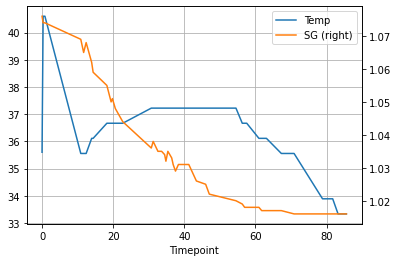

In [10]:
ax = df.plot(y="Temp")
df.plot(y="SG", secondary_y=True, ax=ax)
ax.grid("on")
plt.show()

When I started the fermentation I was not sure if the wort had actually reached a low enough temperature. From the plot it can be seen that it probably hadn't. To cool it down I carried the fermentor out to the terrace and waited for it to cool down a bit. I am not sure if it was needed or not. 

## Conclusion
Preparing and plotting the tilt data using pandas was very easy. In the future I think I will stick to this solution instead of google docs.